In [2]:
####Question 1####

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

In [81]:
def object_to_float(object_list):
    float_list = []
    for object_type in object_list:
        clean_object = object_type.replace("%","")
        convert_object = float(clean_object)
        decimal_object = convert_object / 100
        float_list.append(decimal_object)  
    return float_list
        
def efficient_weights(asset_returns, risk_free_rate):
    # calculate mean returns
    asset_returns_mean = asset_returns.mean()
#     # calcualte returns variance
    asset_returns_cov = asset_returns.cov()
#     # calculate excess returns
    asset_returns_excess = asset_returns_mean - risk_free_rate
#     # calculate efficient weights numerate
    weights_eff_numerator  = np.linalg.inv(asset_returns_cov)@asset_returns_excess
#     # calculate efficient weights denominator
    weights_eff_denominator = np.ones(len(asset_returns_excess)).T@np.linalg.inv(asset_returns_cov)@asset_returns_excess
#     # calculate efficient weights
    weights_eff = weights_eff_numerator / weights_eff_denominator
    return weights_eff 

def portfolio_returns(asset_returns, weights):
    returns_mean = asset_returns.mean()
    exp_returns = weights.T@returns_mean
    return exp_returns

def portfolio_risk(asset_returns,weights):
    # calculate asset covariance
    asset_cov = asset_returns.cov()
    exp_risk = weights.T@asset_cov@weights
    return exp_risk

def portfolio_covariance(asset_returns, weights,weights2):
    # calculate the covariance of asset returns
    asset_cov = asset_returns.cov()
    # calculate portfolio covariance
    portfolio_cov = weights.T@asset_cov@weights2
    return portfolio_cov
def global_min_var_portfolio(asset_returns):
    # calculate asset returns covariance
    asset_returns_cov = asset_returns.cov()
    # create ones vector of length asset returns
    ones_vec=np.ones(len(asset_returns_cov))
    # calculate gmvp numerator
    gmvp_num = np.linalg.inv(asset_returns_cov)@ones_vec
    # calculate gmvp denominator
    gmvp_den = (ones_vec.T@np.linalg.inv(asset_returns_cov)@ones_vec)
    # calculate gmvp
    gmvp = gmvp_num / gmvp_den
    return gmvp

In [101]:
data=pd.read_csv("data/CSWIX_Equity.csv")#read_excel("C:/Users/user/Downloads/assignmentpythoncode/FINE7072 - Assignment Data_2023.xlsx",index_col=0,sheet_name='Asset Class Data_CSWIX Equity')
# data cleanining
# change unnamed: 0 to date
data["Date"] = pd.to_datetime(data["Unnamed: 0"])
# drop unecessary columns
data = data.drop(labels = ["Unnamed: 0","Unnamed: 9","Unnamed: 10",
                                  "Unnamed: 11","Unnamed: 12","Unnamed: 13",
                                  "Unnamed: 14","Unnamed: 15","Unnamed: 16",
                                   "Unnamed: 17"],
                        axis=1)

means_data=pd.read_csv("data/Expected_Returns.csv")#read_excel("C:/Users/user/Downloads/assignmentpythoncode/FINE7072 - Assignment Data_2023.xlsx",index_col=0,sheet_name='Expected Returns')

means_data

,Asset Class,Expected Return (Annual)
0,SA Equity,15.00%
1,SA Nominal Bonds,9.50%
2,SA ILB,8.70%
3,SA Property,11.00%
4,SA Cash,6.50%
5,Offshore Equity,13.00%
6,Offshore Property,8.00%
7,Offshore Bonds,8.30%


In [102]:
data

,SA Equity,SA Nominal Bonds,SA ILB,SA Property,SA Cash,Offshore Equity,Offshore Property,Offshore Bonds,Date
0,0.021720,0.006890,0.001790,0.084787,0.006946,0.051911,NaN,0.014841,2007-01-31
1,0.013512,0.013678,-0.003277,0.033749,0.006395,-0.006123,0.003727,0.025924,2007-02-28
2,0.033642,-0.004350,0.011483,0.032042,0.007160,0.023853,0.008252,-0.000661,2007-03-31
3,0.034085,0.015311,0.010923,0.077894,0.007063,0.009111,-0.029540,-0.019052,2007-04-30
4,-0.005539,-0.011036,0.002054,-0.036594,0.007336,0.042699,0.018951,-0.009298,2007-05-31
...,...,...,...,...,...,...,...,...,...
192,0.069622,0.029374,-0.009807,-0.007909,0.005823,0.094924,0.113229,0.056141,2023-01-31
193,-0.023174,-0.008679,0.004526,-0.001366,0.005423,0.027808,0.006058,0.019410,2023-02-28
194,-0.019518,0.013224,0.014809,-0.039229,0.006145,-0.003431,-0.067355,-0.000226,2023-03-31
195,0.034323,-0.011122,0.004033,0.057537,0.006095,0.044226,0.045365,0.032379,2023-04-30


Select all assets from the second row because first row has a Nan in Offshore property

In [103]:
ret_data = data.iloc[1:,:-1] 
ret_data

,SA Equity,SA Nominal Bonds,SA ILB,SA Property,SA Cash,Offshore Equity,Offshore Property,Offshore Bonds
1,0.013512,0.013678,-0.003277,0.033749,0.006395,-0.006123,0.003727,0.025924
2,0.033642,-0.004350,0.011483,0.032042,0.007160,0.023853,0.008252,-0.000661
3,0.034085,0.015311,0.010923,0.077894,0.007063,0.009111,-0.029540,-0.019052
4,-0.005539,-0.011036,0.002054,-0.036594,0.007336,0.042699,0.018951,-0.009298
5,-0.018828,-0.020561,-0.001239,-0.033932,0.007185,-0.018974,-0.088012,-0.014880
...,...,...,...,...,...,...,...,...
192,0.069622,0.029374,-0.009807,-0.007909,0.005823,0.094924,0.113229,0.056141
193,-0.023174,-0.008679,0.004526,-0.001366,0.005423,0.027808,0.006058,0.019410
194,-0.019518,0.013224,0.014809,-0.039229,0.006145,-0.003431,-0.067355,-0.000226
195,0.034323,-0.011122,0.004033,0.057537,0.006095,0.044226,0.045365,0.032379


The code below convert the means data from a list of strings to a list of numeric values. The list of numeric values is then converted to a Numpy array.

In [104]:
means_data_list= object_to_float(means_data['Expected Return (Annual)'].tolist())
means_array_data = np.array(means_data_list)
means_array_data

array([0.15 , 0.095, 0.087, 0.11 , 0.065, 0.13 , 0.08 , 0.083])

The risk free rates are determined below.


In [105]:
#risk-free proxy of 5% per annum
c = 0.05/12 # monthly risk-free rate

In [106]:
low_risk_benchmark = c + 0.03/12
high_risk_benchmark = c + 0.07/12

In [107]:
low_risk_benchmark < high_risk_benchmark

True

In [108]:
#provided means (means_array_data) vs calculated means (ret_data.mean()), 
#data_mean = ret_data.mean()
data_mean = means_array_data/12 # calculate the mean of the expected retrun to monthly return?
data_mean.shape

(8,)

In [31]:
# data_er = np.ones(8)*low_risk_benchmark #(0.08/12 - c) # low risk - 3/12
# # data_er2 = np.ones(8)*high_risk_benchmark #(0.12/12 - c) # high risk 7/12



In [32]:
# data_er> data_er2

In [33]:
# #finding efficient weights(z1)
# z1=(np.linalg.inv(data_cov)@data_er)/(np.ones(len(data_er)).T@np.linalg.inv(data_cov)@data_er)
# #finding efficient weights(z2)
# z2=(np.linalg.inv(data_cov)@data_er2)/(np.ones(len(data_er2)).T@np.linalg.inv(data_cov)@data_er2)

Calculate the efficient weights for each portfolio - low_risk and high_risk.

In [34]:
z1 = efficient_weights(ret_data, low_risk_benchmark)
z2 = efficient_weights(ret_data, high_risk_benchmark)

In [35]:
sum(z1), sum(z2) # check that the efficient weights sum up to one

(0.9999999999999998, 1.0000000000000004)

Calculate the following for each portfolio:
* expected returns
* Variance
* Standard Deviation
* Covariance between the portfolio

In [38]:
# calculate the covariance between the portfolios using the different weights
ret_data_cov = ret_data.cov()

In [82]:
####Question 2####
#portfolio 1 and 2's exp returns
pf_ret1=portfolio_returns(ret_data, z1)
pf_ret2=portfolio_returns(ret_data,z2)

In [83]:
#  Porfolio variances, sd, and covariances.
pf_var1 = portfolio_risk(ret_data, z1)
pf_var2=portfolio_risk(ret_data, z2)
# calculate std
pf_sd1 = np.sqrt(pf_var1)
pf_sd2 = np.sqrt(pf_var2)
# portfolio covariance
cov12=portfolio_covariance(ret_data, z1,z2)

In [50]:
pf_var1 > pf_var2 # 

True

In [51]:
print(pf_ret1,pf_sd1)
print(pf_ret2,pf_sd2)

0.005386986312909949 0.0015671470840091088
0.005511750073051041 0.001468522019796912


In [75]:
ef_wght=np.arange(-10,10,0.1)

ef_ret=pf_ret1*ef_wght+pf_ret2*(1-ef_wght)
ef_var=ef_wght**2*pf_var1+(1-ef_wght)**2*pf_var2+2*ef_wght*(1-ef_wght)*cov12
ef_std=np.sqrt(ef_var)



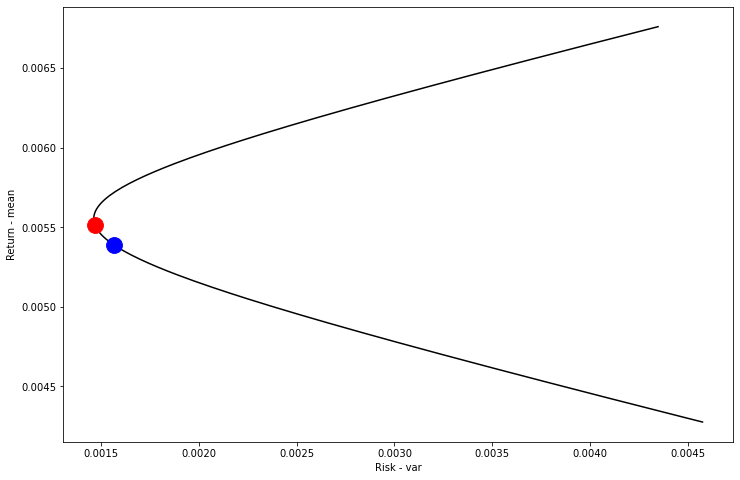

In [80]:
fig,ax=plt.subplots(figsize=(12,8))
plt.xlabel("Risk - var")
plt.ylabel("Return - mean")
plt.plot(ef_std,ef_ret,color='k')
ax.scatter(pf_sd1,pf_ret1,color='blue',s=250,zorder=2)
ax.scatter(pf_sd2,pf_ret2,color='red',s=250,zorder=2) 



#xxxx~Something aint right~xxxx#

Why does the 8% return -target portfolio- have higher risk than the 12% target portfolio#

####Insights??######

The problem should be here:
#data_er = data_mean + 0.08/12 - c
#data_er2 = data_mean + 0.12/12 - c

data_sd=ret_data.std()
ax.scatter(data_sd,data_mean)

## calculate global minimum variance

In [53]:
gmvp = global_min_var_portfolio(ret_data) 
gmvp

array([ 2.00226584e-03, -7.20305239e-04,  2.32973573e-03, -1.50497879e-03,
        9.93892848e-01,  4.81167770e-03,  5.60081444e-03, -6.41205728e-03])

In [55]:
gmvp_ser=pd.Series(gmvp,index=ret_data_cov.index)

calculate the global minimum variance portfolio retuns and risk

In [86]:
means_array_data/12

array([0.0125    , 0.00791667, 0.00725   , 0.00916667, 0.00541667,
       0.01083333, 0.00666667, 0.00691667])

In [87]:
gmvp_ret= gmvp_ser.T@data_mean # gmvp returns

In [88]:
gmvp_sd = np.sqrt(gmvp_ser.T@ret_data_cov@gmvp_ser)

In [89]:
print(gmvp_ret,gmvp_sd)

0.005551365603371599 0.0014616894066963825


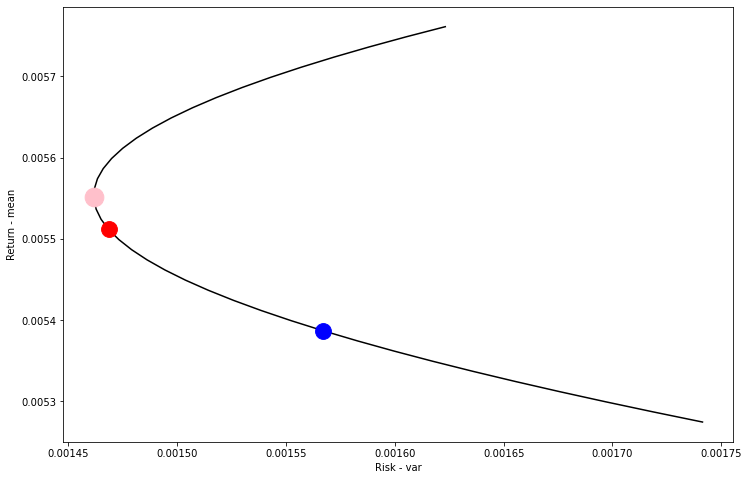

In [90]:
ef_wght=np.arange(-2,2,0.1)
ef_ret=pf_ret1*ef_wght+pf_ret2*(1-ef_wght)
ef_var=ef_wght**2*pf_var1+(1-ef_wght)**2*pf_var2+2*ef_wght*(1-ef_wght)*cov12
ef_std=np.sqrt(ef_var)

fig,ax=plt.subplots(figsize=(12,8))
plt.xlabel("Risk - var")
plt.ylabel("Return - mean")
plt.plot(ef_std,ef_ret,color='k')
ax.scatter(pf_sd1,pf_ret1,color='blue',s=250,zorder=2)
ax.scatter(pf_sd2,pf_ret2,color='red',s=250,zorder=2) 
ax.scatter(gmvp_sd,gmvp_ret,color='pink',s=350,zorder=3)

In [99]:
#Using global minimum variance to find another efficient frontier

# Set a seed for the random number generator
np.random.seed(12)  # Replace 42 with your desired seed value

# random weights to design another efficient frontier 
num_assets = len(ret_data_cov)  # number of assets

# Generate random weights
random_weights = np.random.random(num_assets)
random_weights /= np.sum(random_weights)  # ensure weights sum up to 1

print(random_weights)

[0.04331968 0.20795359 0.07399139 0.1499805  0.00409556 0.25816745
 0.25310042 0.0093914 ]


In [100]:
num_assets

8

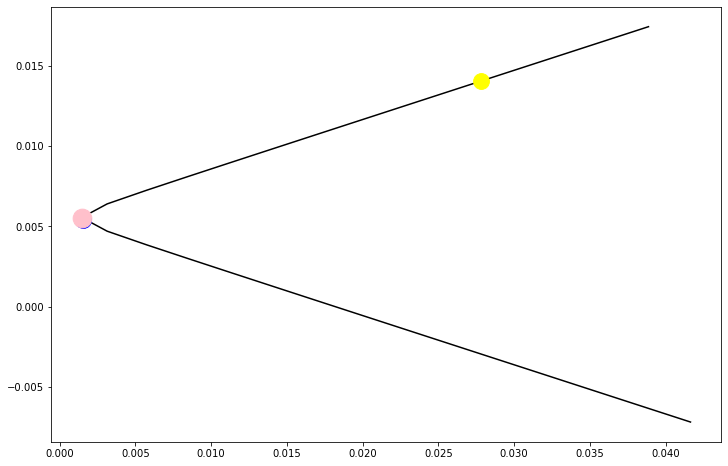

In [92]:
z3 = random_weights
pf_ret3=z3.T@data_mean
pf_var3=z3.T@ret_data_cov@z3
pf_sd3=np.sqrt(pf_var3)

ef_wght2=np.arange(-1.5,1.5,0.1)

cov32 = gmvp_ser.T@ret_data_cov@z3

ef_ret2=pf_ret3*ef_wght2+gmvp_ret*(1-ef_wght2)
ef_var2=ef_wght2**2*pf_var3+(1-ef_wght2)**2*gmvp_sd**2+2*ef_wght2*(1-ef_wght2)*cov32
ef_std2=np.sqrt(ef_var2)

fig,ax=plt.subplots(figsize=(12,8))
plt.plot(ef_std2,ef_ret2,color='k')
plt.plot(ef_std,ef_ret,color='orange')
ax.scatter(pf_sd1,pf_ret1,color='blue',s=250,zorder=2)
ax.scatter(pf_sd2,pf_ret2,color='red',s=250,zorder=2) 
ax.scatter(gmvp_sd,gmvp_ret,color='pink',s=350,zorder=3)
ax.scatter(pf_sd3,pf_ret3,color='yellow',s=250,zorder=3) 

In [93]:
##Question 3##
means_array_data2=means_array_data + 0
means_array_data2

array([0.15 , 0.095, 0.087, 0.11 , 0.065, 0.13 , 0.08 , 0.083])

In [94]:
means_array_data2[5] += 0.25
means_array_data2

array([0.15 , 0.095, 0.087, 0.11 , 0.065, 0.38 , 0.08 , 0.083])

In [95]:
#risk-free proxy of 5% per annum
c = 0.05/12

#provided means (means_array_data) vs calculated means (ret_data.mean()), 
#data_mean = ret_data.mean()
data_mean = means_array_data2/12

#covariance and excess returns (ret_data is my matrix of data)
data_cov = ret_data.cov()
data_er = data_mean + 0.08/12 - c
data_er2 = data_mean + 0.12/12 - c

#finding efficient weights(z1)
z11=(np.linalg.inv(data_cov)@data_er)/(np.ones(len(data_er)).T@np.linalg.inv(data_cov)@data_er)
#finding efficient weights(z2)
z12=(np.linalg.inv(data_cov)@data_er2)/(np.ones(len(data_er2)).T@np.linalg.inv(data_cov)@data_er2)

In [96]:
print(z1, z11, z2, z12)

[ 4.75216083e-04 -1.50442686e-02  3.07302232e-03 -2.12182214e-03
  1.01669246e+00 -1.76921207e-02  2.34811105e-02 -8.86359605e-03] [-9.53840410e-04  8.00110262e-03  1.96933450e-03 -1.21302579e-03
  9.84434296e-01  1.88557651e-02 -3.19961377e-03 -7.89401787e-03] [ 1.61995284e-03 -4.30646042e-03  2.51582536e-03 -1.65941202e-03
  9.99600970e-01 -8.22385389e-04  1.00773350e-02 -7.02582585e-03] [-8.83201560e-05  5.44755600e-03  2.07485661e-03 -1.29850689e-03
  9.87203671e-01  1.47437877e-02 -6.22930731e-04 -7.46011367e-03]


Text(0.5, 1.0, 'Old Efficient Frontier')

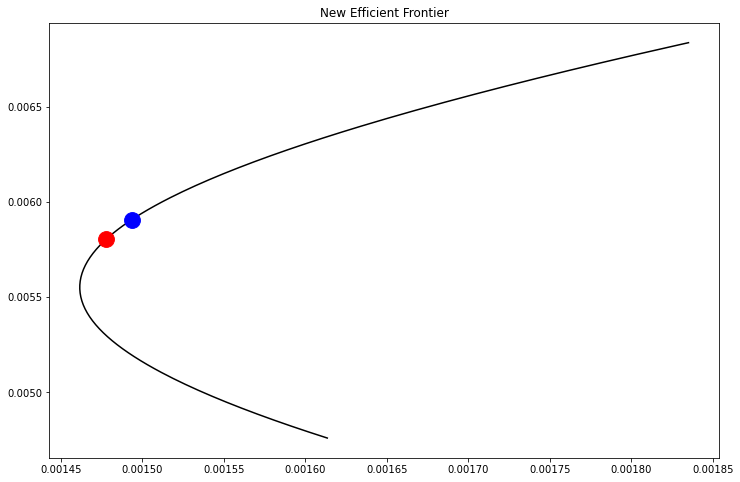

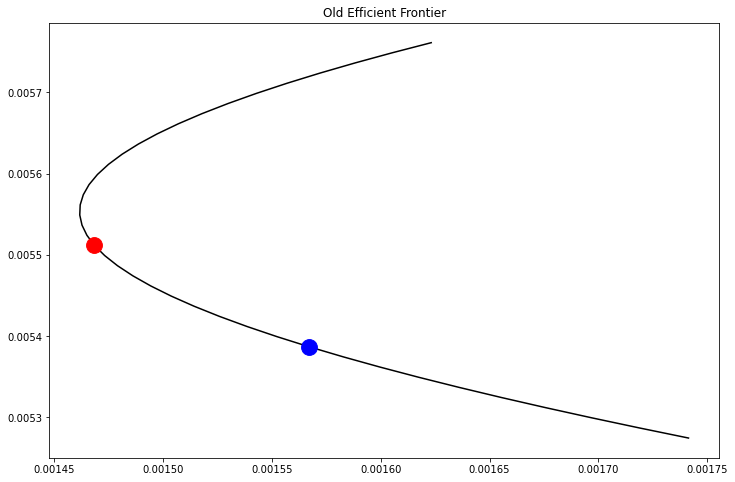

In [97]:
#portfolio 1 and 2's exp returns, variances, sd, and covariances.
pf_ret11=z11.T@data_mean
pf_var11=z11.T@data_cov@z11
pf_sd11=np.sqrt(pf_var11)

pf_ret12=z12.T@data_mean
pf_var12=z12.T@data_cov@z12
pf_sd12=np.sqrt(pf_var12)

cov1112=z11.T@data_cov@z12

ef_wght=np.arange(-10,10,0.1)

ef_ret1=pf_ret11*ef_wght+pf_ret12*(1-ef_wght)
ef_var1=ef_wght**2*pf_var11+(1-ef_wght)**2*pf_var12+2*ef_wght*(1-ef_wght)*cov1112
ef_std1=np.sqrt(ef_var1)


fig,ax=plt.subplots(figsize=(12,8))
plt.plot(ef_std1,ef_ret1,color='k')
ax.scatter(pf_sd11,pf_ret11,color='blue',s=250,zorder=2)
ax.scatter(pf_sd12,pf_ret12,color='red',s=250,zorder=2) 

plt.title('New Efficient Frontier')

fig,ax=plt.subplots(figsize=(12,8))
plt.plot(ef_std,ef_ret,color='k')
ax.scatter(pf_sd1,pf_ret1,color='blue',s=250,zorder=2)
ax.scatter(pf_sd2,pf_ret2,color='red',s=250,zorder=2) 

plt.title('Old Efficient Frontier')
